In [9]:
# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages


## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [42]:
df_a=pd.read_csv('Metrics_Dataset/5_a.csv')
df_a.head # getting data info

<bound method NDFrame.head of          y     proba
0      1.0  0.637387
1      1.0  0.635165
2      1.0  0.766586
3      1.0  0.724564
4      1.0  0.889199
...    ...       ...
10095  1.0  0.665371
10096  1.0  0.607961
10097  1.0  0.777724
10098  1.0  0.846036
10099  1.0  0.679507

[10100 rows x 2 columns]>

In [43]:
import numpy as np
import pandas as pd
df_a=pd.read_csv('Metrics_Dataset/5_a.csv')
df_a.head # getting data info
df_a['y']=df_a['y'].apply(np.int64) # Converted float values of y column to int type:
y_predicted = []
for i in df_a['proba']:
    if i<0.5:
        y_predicted.append(0)
    else:
        y_predicted.append(1)
df_a['y_predicted']=y_predicted #A new column namely y_predicted is added to an existing dataframe based on proba values..

# 1.Compute Confusion Matrix,All the four elements of Confusion matrix is initialised and hence confusion matrix is created.

TP = len(df_a[(df_a['y']==1) & (df_a['y_predicted']==1)])
TN = len(df_a[(df_a['y']==0) & (df_a['y_predicted']==0)]) 
FN = len(df_a[(df_a['y']==1) & (df_a['y_predicted']==0)])
FP = len(df_a[(df_a['y']==0) & (df_a['y_predicted']==1)])

matrix = np.array([[TN,FN],[FP,TP]])
print("Confusion matrix of above dataset is:")
print(matrix)

# Using the elements of confusion matrix we can find other metrics such as precision,recall,F1 Score,Accuracy

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1_Score = (2*Precision*Recall)/(Precision+Recall)
print("\nF1_Score of above dataset is:")
print(F1_Score)

Accuracy = (TP+TN)/(TP+TN+FP+FN)# number of correctly predicted values is divided by total number of values
print("\nAccuracy of above dataset is:")
print(Accuracy)

Confusion matrix of above dataset is:
[[    0     0]
 [  100 10000]]

F1_Score of above dataset is:
0.9950248756218906

Accuracy of above dataset is:
0.9900990099009901


In [44]:
def tpr_fpr(df):
    tp = len(df[(df['y']==1) & (df['y_predicted']==1)])
    fp = len(df[(df['y']==0) & (df['y_predicted']==1)])
    tn = len(df[(df['y']==0) & (df['y_predicted']==0)])
    fn = len(df[(df['y']==1) & (df['y_predicted']==0)])
    
    tpr = tp/(tp+fn)
    fpr = fp/(tn+fp)

    return [tpr,fpr]

## Defined  Functions to find True Positive Rate(tpr) and False Positive Rate(fpr),Hence to compute AUC_Score

1.While computing AUC score you need to calculate "TPR","FPR" at every threshold by using actual "y" and predicted "y_predicted".

2.This function returns a list of tpr and fpr.

3.Computed AUC Score,after computing different thresholds and for each threshold tpr,fpr are computed and then used              np.trapz(tpr_array, fpr_array) to determine area.

In [39]:
import tqdm
def calculate_tpr_fpr(main_df):
    tpr_thresholds = []
    fpr_thresholds = []
    
    sorted_df = main_df.sort_values(by=['proba'],ascending=False) # Sorted dataframe in ascending order according to proba values
    
    lst = sorted_df['proba'] # Sorted column of df_a is stored in lst
    
    for threshold in tqdm(lst): #This loop iterates over the list lst and performs certain task for every value
        sorted_df['y_predicted'] = np.where(sorted_df['proba'] >= threshold, 1, 0)
        tpr_fpr_arr = tpr_fpr(sorted_df)
        tpr_thresholds.append(tpr_fpr_arr[0])
        fpr_thresholds.append(tpr_fpr_arr[1])

    return tpr_thresholds,fpr_thresholds

In [45]:
from tqdm import tqdm
tpr_array,fpr_array =calculate_tpr_fpr(df_a)
AUC_Score_a = np.trapz(tpr_array,fpr_array)
print("\nAUC_Score for dataset df_a is:",AUC_Score_a)

100%|███████████████████████████████████████████████████████████████████████████| 10100/10100 [00:57<00:00, 177.11it/s]


AUC_Score for dataset df_a is: 0.48829900000000004


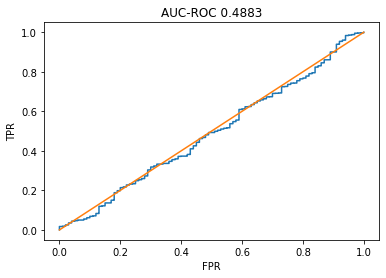

In [24]:
import matplotlib.pyplot as plt
plt.plot(fpr_array,tpr_array)
plt.plot([0,1],[0,1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC-ROC {0}".format(round(AUC_Score_a,4)))
plt.show()



## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [47]:
df_b=pd.read_csv('Metrics_Dataset/5_b.csv')
df_b.head

<bound method NDFrame.head of          y     proba
0      0.0  0.281035
1      0.0  0.465152
2      0.0  0.352793
3      0.0  0.157818
4      0.0  0.276648
...    ...       ...
10095  0.0  0.474401
10096  0.0  0.128403
10097  0.0  0.499331
10098  0.0  0.157616
10099  0.0  0.296618

[10100 rows x 2 columns]>

In [48]:
# write your code here for task B
df_b['y']=df_b['y'].apply(np.int64)
y_predict=[]
for j in df_b['proba']:
    if j<0.5:
        y_predict.append(0)
    else:
        y_predict.append(1)

df_b['y_predict']=y_predict

# 1.Compute Confusion Matrix,All the four elements of Confusion matrix are initialised and hence confusion matrix is created.

TP = len(df_b[(df_b['y']==1) & (df_b['y_predict']==1)])
TN = len(df_b[(df_b['y']==0) & (df_b['y_predict']==0)])
FP = len(df_b[(df_b['y']==0) & (df_b['y_predict']==1)])
FN = len(df_b[(df_b['y']==1) & (df_b['y_predict']==0)])

matrix = np.array([[TN,FN],[FP,TP]])
print("Confusion matrix of above dataset:")
print(matrix)

# 2.Compute F1 Score 
P = TP/(TP+FP)
R = TP/(TP+FN)
F1_Score = (2*P*R)/(P+R)
print("\nF1_Score of above dataset is:")
print(F1_Score) # F1 Score is calculated

Accuracy = (TP+TN)/(TP+TN+FP+FN)# number of correctly predicted values is divided by total number of values
print("\nAccuracy of above dataset is:")
print(Accuracy)


Confusion matrix of above dataset:
[[9761   45]
 [ 239   55]]

F1_Score of above dataset is:
0.2791878172588833

Accuracy of above dataset is:
0.9718811881188119


In [49]:
df_b.value_counts(df_b['y_predict'])

y_predict
0    9806
1     294
dtype: int64

In [50]:
# Using above defined functions AUC_Score of this dataset is determined
from tqdm import tqdm
tpr_array_b,fpr_array_b = calculate_tpr_fpr(df_b)
AUC_Score_b = np.trapz(tpr_array_b,fpr_array_b) 
print("\nAUC_Score of dataset df_b is:",AUC_Score_b)

100%|███████████████████████████████████████████████████████████████████████████| 10100/10100 [00:54<00:00, 184.29it/s]


AUC_Score of dataset df_b is: 0.9377570000000001


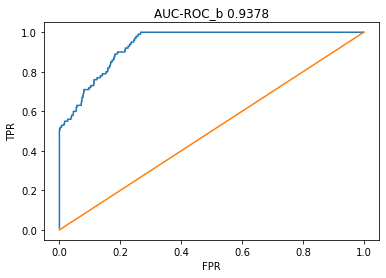

In [32]:
import matplotlib.pyplot as plt
plt.plot(fpr_array_b,tpr_array_b)
plt.plot([0,1],[0,1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC-ROC_b {0}".format(round(AUC_Score_b,4)))
plt.show()

### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [33]:
df_c=pd.read_csv('Metrics_Dataset/5_c.csv')
df_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [50]:
# write your code for task C
y_actual = df_c.iloc[:,0].values #Convert pandas column into numpy ndarray using values attribute
y_proba = df_c.iloc[:,1].values
def Find_A(y,prob,threshold):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    min_of_A = np.inf # we set min_of_a to an positive infinite value
    
    for i in range(len(y_proba)):
        if y_proba[i] >= threshold:
            if y_actual[i]==1:
                TP+=1
            else:
                FP+=1
        if y_proba[i] < threshold:
            if y_actual[i]==0:
                TN+=1
            else:
                FN+=1
    A = (500*FN) + (100*FP) 
    
    return A    


In [66]:
from tqdm import tqdm
def Find_min_A(y,prob,threshold_arr):
    min_of_a = np.inf
    min_of_t = 0
    
    for threshold in tqdm(threshold_arr):
        a = Find_A(y_actual,y_proba,threshold)
        if a<= min_of_a:
            min_of_a = min(a,min_of_a)
            min_of_t = threshold
    return min_of_a,min_of_t

print(Find_min_A(y_actual,y_proba,np.unique(df_c['prob'])))
print("\nThe lowest value of metric A of dataset df_c and the minimal threshold probability value is printed")

100%|█████████████████████████████████████████████████████████████████████████████| 2791/2791 [00:04<00:00, 592.50it/s]

(141000, 0.2300390278970873)

The lowest value of metric A of dataset df_c and the minimal threshold probability value is printed



## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [3]:
df_d=pd.read_csv('Metrics_Dataset/5_d.csv')
df_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [36]:
 # write your code for task 5d
y_actual = df_d['y'].values # Converted dataframe column to numpy ndarray
y_pred = df_d['pred'].values
MSE = np.mean((y_actual-y_pred)**2) 
print("Mean Squared Error of dataset df_d is:  {0}".format(MSE))


Mean Squared Error of dataset df_d is:  177.16569974554707


In [34]:
def R2():
    y_mean = np.mean(y_actual)
    SST = np.mean((y_actual-y_mean)**2)

    R2 = 1-(MSE/SST)

    print("R2 or Coefficient of determination of dataset df_d is:  ",R2)
R2()

R2 or Coefficient of determination of dataset df_d is:   0.9563582786990937


In [33]:
def modified_MAPE():
    error = np.abs(y_actual-y_pred)
    MAPE = np.sum(error)/np.sum(y_actual)
    print("Modified Mean Absolute Percentage Error of dataset df_d is: ",MAPE)
modified_MAPE()

Modified Mean Absolute Percentage Error of dataset df_d is:  0.1291202994009687
